# This is a notebook of the lessons for machine leaning

In [1]:
import pandas as pd

In [2]:
data = {'ages': [14, 16, 18],
        'height': [35, 63, 64]}

In [3]:
index = ['James', 'Bob', 'Amy']
df = pd.DataFrame(data, index=index)
df

,ages,height
James,14,35
Bob,16,63
Amy,18,64


In [4]:
df.loc['Bob']

ages      16
height    63
Name: Bob, dtype: int64

## The lesson two - task regression

In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for drow 3d proection

matplotlib.rc('font', size=18) # for grow up font in the plot

In [7]:
# load data
houses = pd.read_csv('1.4_houses.csv')

In [8]:
houses.head(7)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0


<function matplotlib.pyplot.show(close=None, block=None)>

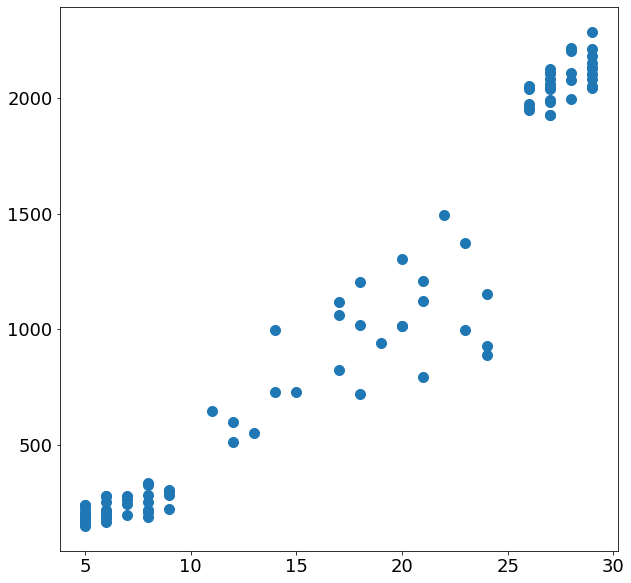

In [9]:
fig = plt.figure(figsize=(10, 10)) # create figure
ax = plt.axes()

# subtitute point on the plot
ax.scatter(houses['dim_1'], houses['price'], s=100) # s  - size markers
plt.show

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X = houses[['dim_1']]
y = houses['price']

In [34]:
# create regressor, learn model
reg = LinearRegression().fit(X, y)

In [35]:
[a] = reg.coef_
a

83.08870108821485

In [36]:
b = reg.intercept_
b

-351.68469784672334

In [37]:
def reg_prediction(dim_1):
    return a*dim_1 + b

In [38]:
# check manual function prediction
reg_prediction(X.dim_1[0])

2057.887633711507

In [52]:
# check built-in prediction in sklearn
y_prediction = reg.predict(X[0:])
y_prediction

array([2057.88763371, 1974.79893262,  146.84750868,   63.75880759,
        146.84750868,   63.75880759, 1891.71023154, 1559.35542718,
        396.11361195, 2057.88763371, 2057.88763371, 2057.88763371,
         63.75880759, 1393.17802501, 2057.88763371,  313.02491086,
       1891.71023154, 1808.62153045,  894.64581848, 1559.35542718,
       1808.62153045,  229.93620977,  313.02491086,  645.37971521,
        313.02491086, 1891.71023154, 1891.71023154,  313.02491086,
       1393.17802501, 1891.71023154,  396.11361195, 1974.79893262,
       1310.08932392,  313.02491086,  229.93620977,  562.29101412,
        146.84750868,  396.11361195, 1143.91192174,  146.84750868,
        146.84750868, 2057.88763371, 1974.79893262,  229.93620977,
         63.75880759,   63.75880759,   63.75880759, 1476.26672609,
        146.84750868,   63.75880759, 1642.44412827,  811.55711739,
         63.75880759, 2057.88763371,  728.4684163 , 1060.82322065,
       1143.91192174,   63.75880759, 1808.62153045,  146.84750

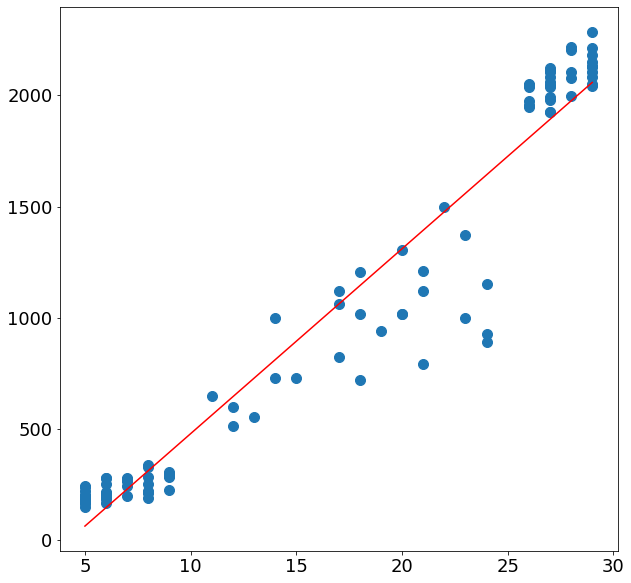

In [55]:
# drow line regression on the plot

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

ax.scatter(houses['dim_1'], houses['price'], s=100)
ax.plot([X.dim_1.min(), X.dim_1.max()], [y_prediction.min(), y_prediction.max()], c='red' )

## Now, Will be able to do for two coefficients

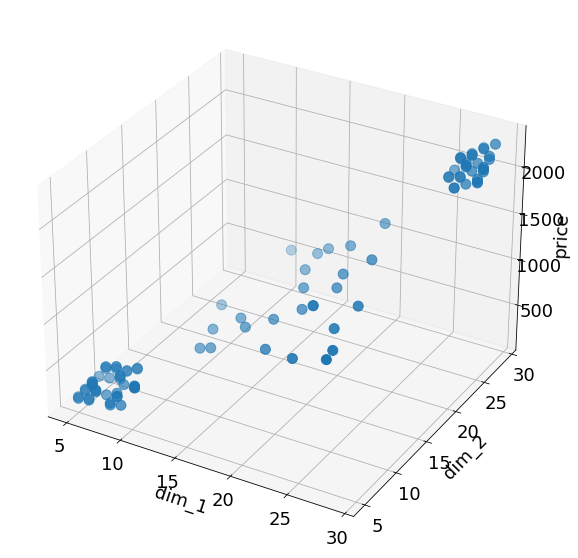

In [62]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.scatter(houses['dim_1'], houses['dim_2'], houses['price'], s=100)

ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')
ax.set_zlabel('price')

plt.show()

In [61]:
from sklearn.linear_model import LinearRegression

In [77]:
X = houses[['dim_1', 'dim_2']]
Y = houses['price']

In [79]:
reg = LinearRegression().fit(X, Y)
[a1, a2] = reg.coef_
b = reg.intercept_

In [81]:
def reg_line_predict(dim_1, dim_2):
    return a1 * dim_1 + a2 * dim_2 + b

In [87]:
reg_line_predict(X['dim_1'][0], X['dim_1'][1])

2080.82359179565

In [112]:
reg.predict(X[0:1])[0]

2080.82359179565

In [114]:
d1, d2 = list(), list()
for x in np.linspace(min(houses['dim_1']), max(houses['dim_1']), num=100):
    for y in np.linspace(min(houses['dim_2']), max(houses['dim_2']), num=100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

/home/stynic/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


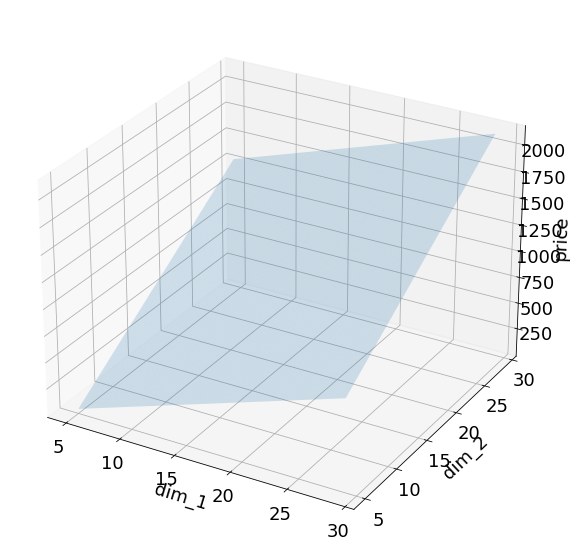

In [118]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)

ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')
ax.set_zlabel('price')

ax.elev = 27
plt.show()